### MNIST: Image Recognition ###

The dataset for the assignment will be the <a href="http://yann.lecun.com/exdb/mnist/index.html">MNIST ("Modified National Institute of Standards and Technology") database of handwritten digits.</a> The source file links as follows.

  * <a href="http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz">train-images-idx3-ubyte.gz</a>:  training set images (9912422 bytes)
  * <a href="http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz">train-labels-idx1-ubyte.gz</a>:  training set labels (28881 bytes)
  * <a href="http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz">t10k-images-idx3-ubyte.gz</a>:   test set images (1648877 bytes)
  * <a href="http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz">t10k-labels-idx1-ubyte.gz</a>:   test set labels (4542 bytes)

The MNIST is widely known as the 'Hello World' dataset for computer vision. Records have already been size-normalized and centered in a fixed-size image, thus useful to try out different machine learning techniques as minimal efforts are required on preprocessing and formatting.

#### Loading the Data ####

The necessary packages are imported, and load the dataset using the load_mnist function. 

For the loading of the MNIST data (load_mnist function), code within *Python Machine Learning* by *Sebastian Raschka & Vahid Mirjalili* was referenced and used. Comments were added to explain the code. The source codes used in the book can also be found in <a href="https://github.com/rasbt/python-machine-learning-book/blob/master/code/ch12/ch12.ipynb">github.</a> 

In [1]:
# Load necessary packages for data exploration
import os
import struct
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline

In [2]:
#store a start time to track total time of notebook
nbstarttime = time.time()

We define load_mnist function which takes in two variables, in order to construct the full path-filename to load. 

The first is path, from the working directory, of the extracted mnist data. The second is kind, which specifies whether to load the training set (kind = 'train') or test set (kind = 't10k'), as indicated in the filename.
The load_mnist function returns two arrays. The first is an array of images, and the second the label (ground truth) for the images (interger from 0-9)

In [3]:
def load_mnist(path, kind='train'):
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
    return images, labels

In [4]:
# Stores the output of load_mnist for the training set into X_train (images) and y_train (label)
X_train, y_train = load_mnist('mnist/', kind='train')

# Stores the output of load_mnist for the testing set into X_test (images) and y_test (label)
X_test, y_test = load_mnist('mnist/', kind='t10k')

#### Describing the Data ####

We assess the shape, type and min/ max properties of the dataset features.

In [5]:
pd.DataFrame({'Dataset': ['Train','Test'],
                         'Rows': [X_train.shape[0],X_test.shape[0]],
                         'Columns': [X_train.shape[1],X_test.shape[1]],
                         'Format': [X_train.dtype,X_test.dtype],
                         'Min Value': [X_train.min(),X_test.min()],
                         'Max Value': [X_train.max(),X_test.max()]})


,Dataset,Rows,Columns,Format,Min Value,Max Value
0,Train,60000,784,uint8,0,255
1,Test,10000,784,uint8,0,255


Each record (or row) contains 784 columns which represents an 28 x 28 pixel image (28 x 28 = 784). Pixel values 0 refers to the background (white), 255 refer to the foreground (black). 

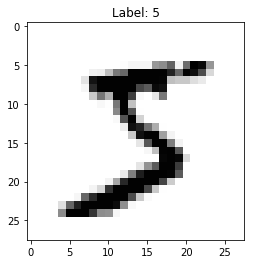

In [6]:
# Show first record
plt.imshow(X_train[0,:].reshape((28,28)),cmap='Greys')
plt.title('Label: %d' % (y_train[0]))
plt.show()

The first record in the dataset has a label 5.

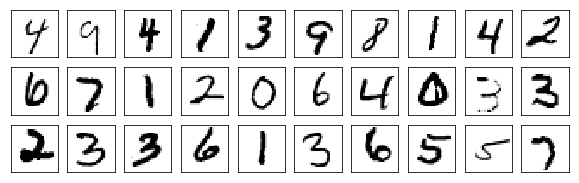

In [7]:
# Show 30 random records
_, ax = plt.subplots(3,10,figsize=(10,3))
for i in range(3):
    for j in range(10):
        r = np.random.randint(X_train.shape[0])
        ax[i,j].imshow(X_train[r].reshape((28,28)), cmap='Greys')
        ax[i,j].set_xticks([])
        ax[i,j].set_yticks([])
plt.show()
plt.close()

Thirty random records shown above, provides an insight on the different handwritings for the digits.

In [8]:
pd.DataFrame({'Dataset': ['Train','Test'],
                         'Rows': [np.matrix(y_train).shape[1],np.matrix(y_test).shape[1]],
                         'Columns': [np.matrix(y_train).shape[0],np.matrix(y_test).shape[0]],
                         'Format': [y_train.dtype,y_test.dtype],
                         'Min Value': [y_train.min(),y_test.min()],
                         'Max Value': [y_train.max(),y_test.max()]})


,Dataset,Rows,Columns,Format,Min Value,Max Value
0,Train,60000,1,uint8,0,9
1,Test,10000,1,uint8,0,9


The shape, type and min/ max properties of the dataset labels are shown above. There 60,000 records for training and 10,000 for testing. The labels are in integer format with a min value of 0 to a max value of 9.

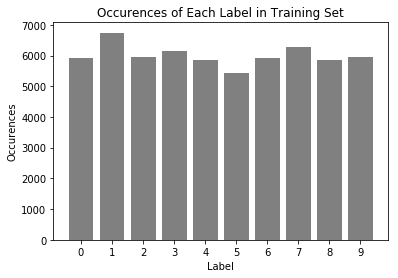

{0: 5923,
 1: 6742,
 2: 5958,
 3: 6131,
 4: 5842,
 5: 5421,
 6: 5918,
 7: 6265,
 8: 5851,
 9: 5949}

In [9]:
# Store frequency counts of each label where unique is the label and counts is its frequency
unique, counts = np.unique(y_train, return_counts=True)

fig, ax = plt.subplots()

plt.bar(np.arange(10), counts, color='grey')
plt.ylabel('Occurences')
plt.xlabel('Label')
plt.title('Occurences of Each Label in Training Set')
plt.xticks(np.arange(10), unique)
plt.show()

display(dict(zip(unique, counts)))

The distribution of labels across the dataset is relatively balanced. "1" occurs most frequently with 6742 counts, and "5" the least at 5421.

First 10 records with label 0


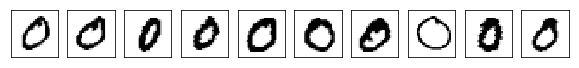

First 10 records with label 1


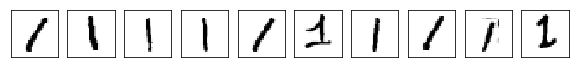

First 10 records with label 2


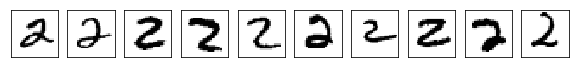

First 10 records with label 3


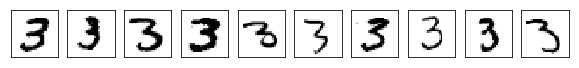

First 10 records with label 4


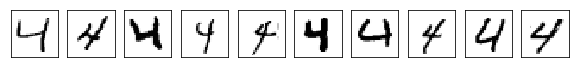

First 10 records with label 5


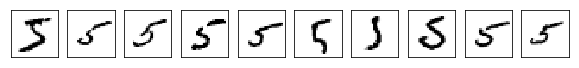

First 10 records with label 6


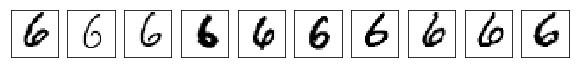

First 10 records with label 7


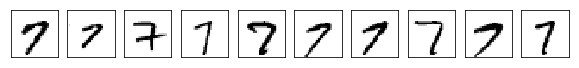

First 10 records with label 8


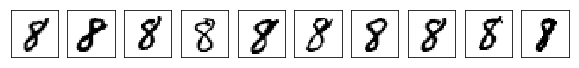

First 10 records with label 9


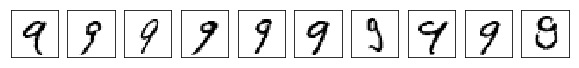

In [10]:
# Show 10 records for each label
for dlbl in range(10):
    print('First 10 records with label %d' % (dlbl))
    _, ax = plt.subplots(1,10,figsize=(10,1)) 
    for dimg in range(10):
        ax[dimg].imshow(X_train[y_train == dlbl][dimg].reshape((28,28)), cmap='Greys')
        ax[dimg].set_xticks([])
        ax[dimg].set_yticks([])
    plt.show()
    plt.close()

In the above, we can see the differences in handwriting in detail for the first 10 records of each label. There are differences in how a digit may be written - two with loop or without. And, in some cases, it appears that even for humans, the classification might be a challenge. For example, and the 10th record with label "9", looks like an "8".

#### Exploration of Models ####

Before beginning with the classification and predictions, the necessary packages (models and scaling) were imported from sklearn. A variety of models had been selected to be explored:-

- Linear Models: 
    1. Logistic Regression, 
    2. Stochastic Gradient Descent 


- Trees: 
    3. Decision Tree


- Distance Based (Neighbors): 
    4. K Nearest Neighbors


- Support Vector Machines: 
    5. Support Vector Classification (SVC), 
    6. Linear SVC


- Naive Bayes: 
    7. Gaussian Naive Bayes


- Ensemble Methods: 
    8. Random Forests and 
    9. Gradient Boosted Regression Tree


- Neural Networks: 
    10. Multi Layer Perceptron

Scaling is often recommended and will improve modelling time and accuracy. By default we scale the features from 0 to 1 by dividing the numbers by 255. 

In [11]:
# Import necessary models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [12]:
# Other packages for experimentation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
import time

In [13]:
# Set seed for replicability.
seedno = 18704
np.random.seed(seedno)

In [14]:
# Create an array of models, with set random_state = seedno, hopefully to achieve replicability of results
models = []
models.append(('LR', LogisticRegression(random_state=seedno)))
# the SGDClassifier uses default max_iter and tol as parameters to avoid warnings
models.append(('SGD', SGDClassifier(max_iter=1000, tol=1e-3, random_state=seedno)))
models.append(('DT', DecisionTreeClassifier(random_state=seedno)))
models.append(('KNN', KNeighborsClassifier(n_neighbors=3)))
models.append(('SVC', SVC(random_state=seedno)))
models.append(('LSVC', LinearSVC(random_state=seedno)))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier(random_state=seedno)))
models.append(('GB', GradientBoostingClassifier(random_state=seedno)))
models.append(('MLP', MLPClassifier(random_state=seedno)))

In [15]:
# Set display to fix at 4 decimal places
pd.options.display.float_format = '{:,.4f}'.format

In [16]:
# normalize data into 0,1 range
Xtr_scale = np.true_divide(X_train, 255)

In [17]:
# !!! Warning, code took X hours to run. 
# Remove multi-line comment "Ctl + /" on Windows or "Cmd + /" on Mac to run code.

model_names = []
scaler_names = []
fittypes = []
scores = []
runtimes = []
index = 0
# A StratifiedKFold of K=3 instead of the typical 10 fold is used to reduce code runtime.
skfold = StratifiedKFold(n_splits=3,random_state=seedno)
starttime = time.time()

for model_name, model in models:
    model_starttime = time.time()
    score = cross_val_score(model,Xtr_scale,y_train, cv=skfold, scoring = 'accuracy').mean()
    runtime = (time.time() - model_starttime)
    model_names.append(model_name)
    scaler_names.append('S255')
    fittypes.append('skfold_n3')
    scores.append(score)
    runtimes.append(runtime)

# too impatient to view results after X hours. display score and runtime per model/scaler after each run
    models_fit = pd.DataFrame({"Model": model_names,"Scalers": scaler_names, "CV" : fittypes, "Score": scores, "Runtime": runtimes})
    display(models_fit.loc[[index],:])
    index += 1

,Model,Scalers,CV,Score,Runtime
0,LR,S255,skfold_n3,0.9137,146.8055


,Model,Scalers,CV,Score,Runtime
1,SGD,S255,skfold_n3,0.8998,22.0420


,Model,Scalers,CV,Score,Runtime
2,DT,S255,skfold_n3,0.8596,38.8751


,Model,Scalers,CV,Score,Runtime
3,KNN,S255,skfold_n3,0.9682,"3,020.6570"


,Model,Scalers,CV,Score,Runtime
4,SVC,S255,skfold_n3,0.9343,"1,639.1866"


,Model,Scalers,CV,Score,Runtime
5,LSVC,S255,skfold_n3,0.9103,176.5021


,Model,Scalers,CV,Score,Runtime
6,GNB,S255,skfold_n3,0.5589,6.1772


,Model,Scalers,CV,Score,Runtime
7,RF,S255,skfold_n3,0.9407,8.0147


,Model,Scalers,CV,Score,Runtime
8,GB,S255,skfold_n3,0.9426,"6,553.1821"


,Model,Scalers,CV,Score,Runtime
9,MLP,S255,skfold_n3,0.9708,155.9744


In [18]:
# As an alternative, to avoid running the 1.5 hour code above everytime the kernel 
# is restarted, the output from the code was writen to csv.
# The csv was read as a dataframe to avoid re-running the code. Uncomment if you wish to read from csv 

models_fit.to_csv('models_fit.csv')
models_fit = pd.read_csv('models_fit.csv')
del models_fit['Unnamed: 0']
# display(models_fit)

,Model,Score,Runtime
9,MLP,0.9708,155.9744
3,KNN,0.9682,"3,020.6570"
8,GB,0.9426,"6,553.1821"
7,RF,0.9407,8.0147
4,SVC,0.9343,"1,639.1866"
0,LR,0.9137,146.8055
5,LSVC,0.9103,176.5021
1,SGD,0.8998,22.0420
2,DT,0.8596,38.8751
6,GNB,0.5589,6.1772


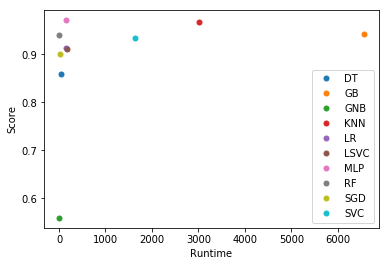

In [19]:
groups = models_fit.groupby('Model')

models_fit = pd.DataFrame({"Model": model_names,"Scalers": scaler_names, "CV": fittypes, "Score": scores, "Runtime": runtimes})
display(models_fit.loc[:, ['Model', 'Score', 'Runtime']].sort_values(by='Score',ascending=False))

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.Runtime, group.Score, marker='o', linestyle='', ms=5, label=name)
ax.legend()
plt.xlabel('Runtime')
plt.ylabel('Score')

plt.show()

In [20]:
print('Time taken to now: {} mins'.format((time.time()-nbstarttime)/60))

Time taken to now: 196.22304143508276 mins


#### Feature Selection ####

From the results above, the best results had been achieved by neural nets, nearest neighbors and ensemble methods. Naive Bayes results in the worst accuracy score at 56%. Whereas, Gradient Boosting Classifier, KNN and SVC results in long runtime of more than 25 minutes.

For our further experimentation, we will use random forest classifier. As it produces good results in short run time.

In [21]:
# Build a forest and compute the feature importances
rf_model = RandomForestClassifier(random_state=seedno)
rf_model.fit(Xtr_scale, y_train)
rf_feature_importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_],
             axis=0)
indices = np.argsort(rf_feature_importances)[::-1]

In [22]:
# Print the feature ranking
print("Feature ranking:")

for f in range(Xtr_scale.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], rf_feature_importances[indices[f]]))

Feature ranking:
1. feature 433 (0.011700)
2. feature 405 (0.010283)
3. feature 406 (0.010277)
4. feature 427 (0.010126)
5. feature 410 (0.009991)
6. feature 155 (0.009828)
7. feature 401 (0.009452)
8. feature 543 (0.009400)
9. feature 211 (0.009365)
10. feature 377 (0.009353)
11. feature 461 (0.009223)
12. feature 375 (0.009112)
13. feature 657 (0.008843)
14. feature 407 (0.008550)
15. feature 597 (0.008373)
16. feature 432 (0.007631)
17. feature 462 (0.007623)
18. feature 486 (0.007524)
19. feature 154 (0.007317)
20. feature 541 (0.007008)
21. feature 515 (0.006809)
22. feature 430 (0.006806)
23. feature 429 (0.006797)
24. feature 378 (0.006719)
25. feature 323 (0.006386)
26. feature 514 (0.006318)
27. feature 151 (0.006302)
28. feature 516 (0.006276)
29. feature 291 (0.006267)
30. feature 431 (0.006192)
31. feature 570 (0.005889)
32. feature 428 (0.005857)
33. feature 318 (0.005810)
34. feature 436 (0.005789)
35. feature 409 (0.005688)
36. feature 290 (0.005640)
37. feature 465 (0.0

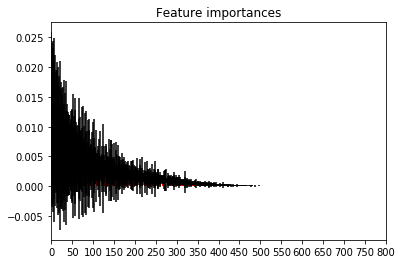

In [23]:
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(Xtr_scale.shape[1]), rf_feature_importances[indices],
       color="r", yerr=std[indices], align="center")
#plt.xticks(range(Xtr_scale.shape[1]), indices)
plt.xlim([-1, Xtr_scale.shape[1]])
plt.xticks(np.arange(0,801,50))
plt.show()

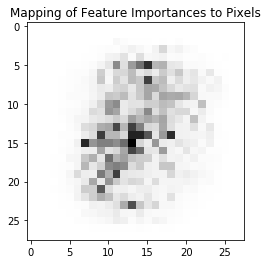

In [24]:
plt.imshow(rf_feature_importances.reshape((28,28)),cmap='Greys')
plt.title('Mapping of Feature Importances to Pixels')
plt.show()

We explored feature selection using random forest.

In [25]:
from sklearn.feature_selection import RFECV
rf_model = RandomForestClassifier(random_state=seedno)
rfecv = RFECV(estimator = rf_model, step=1, cv=skfold, scoring='accuracy')
rfecv.fit(Xtr_scale, y_train)

RFECV(cv=StratifiedKFold(n_splits=3, random_state=18704, shuffle=False),
   estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=18704, verbose=0,
            warm_start=False),
   n_jobs=1, scoring='accuracy', step=1, verbose=0)

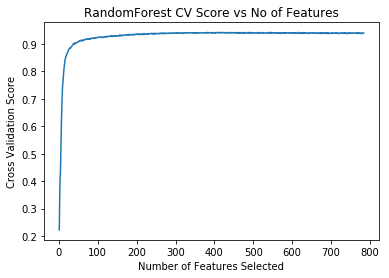

In [26]:
plt.figure()
plt.title('RandomForest CV Score vs No of Features')
plt.xlabel('Number of Features Selected')
plt.ylabel('Cross Validation Score')
plt.plot(range(1, len(rfecv.grid_scores_) + 1),rfecv.grid_scores_)
plt.show()

In [27]:
fimpt_boolean = np.array(list(zip(Xtr_scale,rfecv.support_)))
fimpt_boolean = np.array(fimpt_boolean[:,1].astype(bool))

In [28]:
X_new = Xtr_scale[:,fimpt_boolean]
initial_score = cross_val_score(rf_model, Xtr_scale, y_train, cv=skfold, scoring='accuracy').mean()
new_score = cross_val_score(rf_model, X_new, y_train, cv=skfold, scoring='accuracy').mean()

In [29]:
print("Initial Accuracy : {} ".format(initial_score))
print("Accuracy after Feature Selection : {} ".format(new_score))
print("Retained %d features of %d" % (np.count_nonzero(fimpt_boolean), len(fimpt_boolean)))

Initial Accuracy : 0.9406501153750094 
Accuracy after Feature Selection : 0.9401333203925896 
Retained 545 features of 784


Based on the above, random forests had achieved slightly better results with feature selection.

#### Model Parameters

In [30]:
from sklearn.model_selection import GridSearchCV

rfr_param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

grid_search = GridSearchCV(rf_model, rfr_param_grid, cv=10,
                           scoring='accuracy', return_train_score=True)
grid_search.fit(X_new, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=18704, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

The best hyperparameter combination found:

In [31]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [32]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=18704, verbose=0,
            warm_start=False)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [33]:
gs_res = grid_search.cv_results_
for mean_score, params in zip(gs_res["mean_test_score"], gs_res["params"]):
    print(mean_score, params)

0.79585 {'max_features': 2, 'n_estimators': 3}
0.9137333333333333 {'max_features': 2, 'n_estimators': 10}
0.9484333333333334 {'max_features': 2, 'n_estimators': 30}
0.8251333333333334 {'max_features': 4, 'n_estimators': 3}
0.9272666666666667 {'max_features': 4, 'n_estimators': 10}
0.9543 {'max_features': 4, 'n_estimators': 30}
0.8413333333333334 {'max_features': 6, 'n_estimators': 3}
0.9336 {'max_features': 6, 'n_estimators': 10}
0.9571666666666667 {'max_features': 6, 'n_estimators': 30}
0.85135 {'max_features': 8, 'n_estimators': 3}
0.93635 {'max_features': 8, 'n_estimators': 10}
0.9579333333333333 {'max_features': 8, 'n_estimators': 30}
0.8183666666666667 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.924 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.8349 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.9313666666666667 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}
0.84295 {'bootstrap': False, 'max_features': 4, 'n_estimators': 

We try using randomized seach cv to see if the performance can be improved.

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

rfr_distr = {
        'n_estimators': randint(low=1, high=50),
        'max_features': randint(low=1, high=10),
    }

rnd_search = RandomizedSearchCV(rf_model, param_distributions=rfr_distr,
                                n_iter=10, cv=10, scoring='accuracy',random_state=seedno)
rnd_search.fit(X_new, y_train)

RandomizedSearchCV(cv=10, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=18704, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1141b1358>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1142b1780>},
          pre_dispatch='2*n_jobs', random_state=18704, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [35]:
rs_res = rnd_search.cv_results_
for mean_score, params in zip(rs_res["mean_test_score"], rs_res["params"]):
    print(mean_score, params)

0.9546833333333333 {'max_features': 4, 'n_estimators': 31}
0.9496 {'max_features': 6, 'n_estimators': 19}
0.9500666666666666 {'max_features': 1, 'n_estimators': 45}
0.94835 {'max_features': 1, 'n_estimators': 39}
0.9452666666666667 {'max_features': 4, 'n_estimators': 18}
0.9564166666666667 {'max_features': 8, 'n_estimators': 26}
0.95765 {'max_features': 6, 'n_estimators': 31}
0.9561333333333333 {'max_features': 3, 'n_estimators': 44}
0.9554166666666667 {'max_features': 6, 'n_estimators': 26}
0.9461166666666667 {'max_features': 5, 'n_estimators': 18}


In [36]:
rnd_search.best_params_

{'max_features': 6, 'n_estimators': 31}

In [37]:
rnd_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=31, n_jobs=1,
            oob_score=False, random_state=18704, verbose=0,
            warm_start=False)

The random search achieved a better accuracy score at a much shorter runtime. This is likely to be because in grid search we search through the entire grid of parameters. In order to manage run time, we select a smaller subset of possible combinations. On the other hand random search can cover a larger base, and yet with the capability to set the number of iterations we can reduce runtime.

In [38]:
rfr=RandomForestClassifier(random_state=seedno)
rnd_rfr=RandomForestClassifier(**rnd_search.best_params_,random_state=seedno)

initial_score=cross_val_score(rfr,X=X_train, y=y_train,cv=10,scoring='accuracy').mean()
print('Initial Score: {}'.format(initial_score))
      
rfecv_score=cross_val_score(rfr,X=X_new, y=y_train,cv=10,scoring='accuracy').mean()
print('RFECV Score: {}'.format(rfecv_score))
 
rndsearch_score=cross_val_score(rnd_rfr,X=X_train, y=y_train,cv=10,scoring='accuracy').mean()
print('Random Search Best Score: {}'.format(rndsearch_score))

rnd_rfecv_score=cross_val_score(rnd_rfr,X=X_new,y=y_train,cv=10,scoring='accuracy').mean()
print('RFECV RS Score: {}'.format(rnd_rfecv_score))

Initial Score: 0.9452999647418027
RFECV Score: 0.9442170783843704
Random Search Best Score: 0.9550664695064134
RFECV RS Score: 0.9576499201405119


In [39]:
from sklearn.metrics import accuracy_score
Xte_scale = np.true_divide(X_test, 255)
Xte_new=Xte_scale[:,fimpt_boolean]
rnd_rfr.fit(X_new, y_train)
y_pred = rnd_rfr.predict(Xte_new)
rnd_rfr_score = accuracy_score(y_test, y_pred)
display(rnd_rfr_score)

0.9593

The model improved from 94.07% when we first ran RandomForestClassifier to 96.3%! Great!

In [40]:
print('Thanks for spending your time on this code! Total time taken (in mins):')
display((time.time()-nbstarttime)/60)

Thanks for spending your time on this code! Total time taken (in mins):


552.9880541364352

The End!